In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
load_dotenv()  

True

In [3]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-pro")

E0000 00:00:1761330029.870250  439760 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [4]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [5]:
def generate_joke(state: JokeState):
    prompt = f"Generate a joke about {state['topic']}."
    result = model.invoke(prompt).content

    return {"joke": result}

In [6]:
def generate_explanation(state: JokeState):
    prompt = f"Explain the following joke: {state['joke']}"
    result = model.invoke(prompt).content

    return {"explanation": result}

In [7]:
graph = StateGraph(JokeState)

graph.add_node("generate_joke", generate_joke)
graph.add_node("generate_explanation", generate_explanation)

graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "generate_explanation")
graph.add_edge("generate_explanation", END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

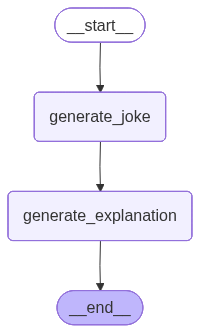

In [8]:
workflow

In [9]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({"topic": "politics"}, config=config1)

{'topic': 'politics',
 'joke': 'A politician was touring a farm and, trying to get a good photo op, hopped onto a fence railing. The railing broke, and he fell into a deep slurry pit.\n\nHe started sinking and screaming for help. The farmer ran over and yelled down, "Give me your hand!"\n\nThe politician just kept flailing and screaming, sinking deeper.\n\nThe farmer yelled again, "Give me your hand!"\n\nStill, nothing. The politician was almost submerged.\n\nThe farmer, a wise old man, thought for a second and then yelled, "Okay, *take* my hand!"\n\nThe politician immediately reached up, grabbed the farmer\'s hand, and was pulled to safety.\n\nOnce he was cleaned off, the dazed politician asked, "How did you know to say that?"\n\nThe farmer sighed. "I\'ve been around a while. I know a politician will never *give* you anything."',
 'explanation': 'Of course! This is a classic joke that plays on a common stereotype. Here\'s a breakdown of why it\'s funny:\n\n### The Core of the Joke\n\n

In [10]:
workflow.get_state(config=config1)

StateSnapshot(values={'topic': 'politics', 'joke': 'A politician was touring a farm and, trying to get a good photo op, hopped onto a fence railing. The railing broke, and he fell into a deep slurry pit.\n\nHe started sinking and screaming for help. The farmer ran over and yelled down, "Give me your hand!"\n\nThe politician just kept flailing and screaming, sinking deeper.\n\nThe farmer yelled again, "Give me your hand!"\n\nStill, nothing. The politician was almost submerged.\n\nThe farmer, a wise old man, thought for a second and then yelled, "Okay, *take* my hand!"\n\nThe politician immediately reached up, grabbed the farmer\'s hand, and was pulled to safety.\n\nOnce he was cleaned off, the dazed politician asked, "How did you know to say that?"\n\nThe farmer sighed. "I\'ve been around a while. I know a politician will never *give* you anything."', 'explanation': 'Of course! This is a classic joke that plays on a common stereotype. Here\'s a breakdown of why it\'s funny:\n\n### The C

In [11]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'politics', 'joke': 'A politician was touring a farm and, trying to get a good photo op, hopped onto a fence railing. The railing broke, and he fell into a deep slurry pit.\n\nHe started sinking and screaming for help. The farmer ran over and yelled down, "Give me your hand!"\n\nThe politician just kept flailing and screaming, sinking deeper.\n\nThe farmer yelled again, "Give me your hand!"\n\nStill, nothing. The politician was almost submerged.\n\nThe farmer, a wise old man, thought for a second and then yelled, "Okay, *take* my hand!"\n\nThe politician immediately reached up, grabbed the farmer\'s hand, and was pulled to safety.\n\nOnce he was cleaned off, the dazed politician asked, "How did you know to say that?"\n\nThe farmer sighed. "I\'ve been around a while. I know a politician will never *give* you anything."', 'explanation': 'Of course! This is a classic joke that plays on a common stereotype. Here\'s a breakdown of why it\'s funny:\n\n### The 

## **Time Travel**

In [12]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0b1062-1004-6982-8000-0167ceb0037d"}})

StateSnapshot(values={'topic': 'politics'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0b1062-1004-6982-8000-0167ceb0037d'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-10-24T18:20:33.007225+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b1062-1000-64c2-bfff-2f664c27a8ce'}}, tasks=(PregelTask(id='d90ea0d8-6311-e2a3-145d-7a33d1763278', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'A politician was touring a farm and, trying to get a good photo op, hopped onto a fence railing. The railing broke, and he fell into a deep slurry pit.\n\nHe started sinking and screaming for help. The farmer ran over and yelled down, "Give me your hand!"\n\nThe politician just kept flailing and screaming, sinking deeper.\n\nThe farmer yelled again, "Give me your hand!"\n\nStill, nothing. The politician was almost

In [13]:
workflow.invoke(None, config={"configurable": {"thread_id": "1", "checkpoint_id": "1f0b1062-1004-6982-8000-0167ceb0037d"}})

{'topic': 'politics',
 'joke': 'A politician is on a campaign tour in the countryside and wants a good photo opportunity. He sees an old farmer leaning on a fence.\n\nThe politician walks over, shakes the farmer\'s hand, and says, "I see you\'ve got a problem with this fence post. It\'s all crooked. It\'s a perfect example of the neglect our communities have faced!"\n\nTo show he\'s a man of action, the politician grabs the post, and with a great deal of grunting and effort for the cameras, he yanks it perfectly straight.\n\nHe turns to the farmer, beaming, and says, "There! Good as new!"\n\nThe farmer slowly shakes his head and says, "Well, you\'ve just ruined it. For ten years, that\'s been the only post the pigs could find that was bent just right for a good back-scratchin\'."',
 'explanation': 'Of course! This is a classic joke that works on several levels. Here\'s a breakdown of why it\'s funny:\n\n### The Core of the Joke\n\nThe humor comes from the massive misunderstanding betwe

In [14]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'politics', 'joke': 'A politician is on a campaign tour in the countryside and wants a good photo opportunity. He sees an old farmer leaning on a fence.\n\nThe politician walks over, shakes the farmer\'s hand, and says, "I see you\'ve got a problem with this fence post. It\'s all crooked. It\'s a perfect example of the neglect our communities have faced!"\n\nTo show he\'s a man of action, the politician grabs the post, and with a great deal of grunting and effort for the cameras, he yanks it perfectly straight.\n\nHe turns to the farmer, beaming, and says, "There! Good as new!"\n\nThe farmer slowly shakes his head and says, "Well, you\'ve just ruined it. For ten years, that\'s been the only post the pigs could find that was bent just right for a good back-scratchin\'."', 'explanation': 'Of course! This is a classic joke that works on several levels. Here\'s a breakdown of why it\'s funny:\n\n### The Core of the Joke\n\nThe humor comes from the massive mi

## **Updating State**

In [15]:
workflow.update_state(
    {
        "configurable": {
            "thread_id": "1",
            "checkpoint_ns": "",
            "checkpoint_id": '1f0b1062-1000-64c2-bfff-2f664c27a8ce'
        }
    },
    {"topic": "trip"}
)


{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b1069-3125-6204-8000-7c7a5fe19cca'}}

In [16]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'trip'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b1069-3125-6204-8000-7c7a5fe19cca'}}, metadata={'source': 'update', 'step': 0, 'parents': {}}, created_at='2025-10-24T18:23:44.385682+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b1062-1000-64c2-bfff-2f664c27a8ce'}}, tasks=(PregelTask(id='39401a6c-9236-9ca8-1b43-aa0a90191d69', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'politics', 'joke': 'A politician is on a campaign tour in the countryside and wants a good photo opportunity. He sees an old farmer leaning on a fence.\n\nThe politician walks over, shakes the farmer\'s hand, and says, "I see you\'ve got a problem with this fence post. It\'s all crooked. It\'s a perfect example of the neglect our communities have 

In [17]:
workflow.invoke(
    None,
    {"configurable": {
        "thread_id": "1",
        "checkpoint_id": "1f0b1069-3125-6204-8000-7c7a5fe19cca"
    }}
)


{'topic': 'trip',
 'joke': 'I just got back from a trip.\n\n"Oh, nice! Where did you go?"\n\nDown the stairs, mostly.',
 'explanation': 'Of course! This is a classic joke that relies on a **pun**, or a play on words.\n\nThe humor comes from the two different meanings of the word "trip":\n\n1.  **The Assumed Meaning:** A journey or a vacation. When the first person says, "I just got back from a trip," the listener naturally assumes they went on a holiday.\n\n2.  **The Actual Meaning:** The act of stumbling or falling.\n\n**Here\'s the breakdown:**\n\n*   **The Setup:** "I just got back from a trip" leads you to think about travel and destinations.\n*   **The Reinforcement:** "Oh, nice! Where did you go?" confirms that the second person is thinking about a vacation.\n*   **The Punchline:** "Down the stairs, mostly" reveals the speaker wasn\'t on a vacation at all. They literally tripped and fell down the stairs.\n\nThe joke is funny because it subverts your expectations in a sudden and s

In [18]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'trip', 'joke': 'I just got back from a trip.\n\n"Oh, nice! Where did you go?"\n\nDown the stairs, mostly.', 'explanation': 'Of course! This is a classic joke that relies on a **pun**, or a play on words.\n\nThe humor comes from the two different meanings of the word "trip":\n\n1.  **The Assumed Meaning:** A journey or a vacation. When the first person says, "I just got back from a trip," the listener naturally assumes they went on a holiday.\n\n2.  **The Actual Meaning:** The act of stumbling or falling.\n\n**Here\'s the breakdown:**\n\n*   **The Setup:** "I just got back from a trip" leads you to think about travel and destinations.\n*   **The Reinforcement:** "Oh, nice! Where did you go?" confirms that the second person is thinking about a vacation.\n*   **The Punchline:** "Down the stairs, mostly" reveals the speaker wasn\'t on a vacation at all. They literally tripped and fell down the stairs.\n\nThe joke is funny because it subverts your expectatio

## **Fault Tolerance**

In [19]:
import time

In [20]:
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str
    step3: str

In [21]:
def step_1(state: CrashState):
    print("Executing Step 1")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState):
    print("Executing Step 2, now manually interrupt the kernel to simulate a crash.")
    time.sleep(30)
    return {"step2": "done"}

def step_3(state: CrashState):
    print("Executing Step 3")
    return {"step3": "done"}
    

In [22]:
graph = StateGraph(CrashState)
graph.add_node("step_1", step_1)
graph.add_node("step_2", step_2)
graph.add_node("step_3", step_3)

graph.add_edge(START, "step_1")
graph.add_edge("step_1", "step_2")
graph.add_edge("step_2", "step_3")
graph.add_edge("step_3", END)

checkpoint_saver = InMemorySaver()
workflow = graph.compile(checkpointer=checkpoint_saver)

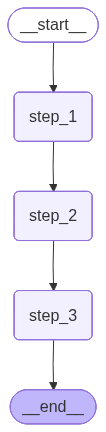

In [23]:
workflow

In [24]:
try:
    print("Starting workflow execution...")
    workflow.invoke({"input": "Test input"}, config={"configurable": {"thread_id": "crash_test"}})
except KeyboardInterrupt:
    print("Workflow interrupted! Simulating crash...")

Starting workflow execution...
Executing Step 1
Executing Step 2, now manually interrupt the kernel to simulate a crash.
Workflow interrupted! Simulating crash...


In [25]:
workflow.get_state(config={"configurable": {"thread_id": "crash_test"}})

StateSnapshot(values={'input': 'Test input', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'crash_test', 'checkpoint_ns': '', 'checkpoint_id': '1f0b1073-8f6e-6158-8001-59b6765a6ef3'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-24T18:28:22.707636+00:00', parent_config={'configurable': {'thread_id': 'crash_test', 'checkpoint_ns': '', 'checkpoint_id': '1f0b1073-8f6c-6e8e-8000-5ebc4863b937'}}, tasks=(PregelTask(id='885154da-c729-f39b-c39f-5b23d956c6b3', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [26]:
workflow.get_state_history(config={"configurable": {"thread_id": "crash_test"}})

<generator object Pregel.get_state_history at 0x112514d60>

In [27]:
list(workflow.get_state_history(config={"configurable": {"thread_id": "crash_test"}}))

[StateSnapshot(values={'input': 'Test input', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'crash_test', 'checkpoint_ns': '', 'checkpoint_id': '1f0b1073-8f6e-6158-8001-59b6765a6ef3'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-24T18:28:22.707636+00:00', parent_config={'configurable': {'thread_id': 'crash_test', 'checkpoint_ns': '', 'checkpoint_id': '1f0b1073-8f6c-6e8e-8000-5ebc4863b937'}}, tasks=(PregelTask(id='885154da-c729-f39b-c39f-5b23d956c6b3', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'Test input'}, next=('step_1',), config={'configurable': {'thread_id': 'crash_test', 'checkpoint_ns': '', 'checkpoint_id': '1f0b1073-8f6c-6e8e-8000-5ebc4863b937'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-10-24T18:28:22.707157+00:00', parent_config={'configurable': {'thread_id': 'crash_test', 'check

In [29]:
final_state = workflow.invoke(None, config={"configurable": {"thread_id": "crash_test"}})
print("Final State after recovery:", final_state)

Executing Step 2, now manually interrupt the kernel to simulate a crash.
Executing Step 3
Final State after recovery: {'input': 'Test input', 'step1': 'done', 'step2': 'done', 'step3': 'done'}


In [30]:
workflow.get_state(config={"configurable": {"thread_id": "crash_test"}})

StateSnapshot(values={'input': 'Test input', 'step1': 'done', 'step2': 'done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': 'crash_test', 'checkpoint_ns': '', 'checkpoint_id': '1f0b1078-0c8b-6d76-8003-a8f720a2f89c'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-10-24T18:30:23.201204+00:00', parent_config={'configurable': {'thread_id': 'crash_test', 'checkpoint_ns': '', 'checkpoint_id': '1f0b1078-0c8a-68c2-8002-f6f4a2394704'}}, tasks=(), interrupts=())